In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import os

In [35]:
# Fonction pour effectuer une régression et afficher les résultats
def regression_and_plot_grouped(df, x_col, y_col, title):
    X = df[x_col].values.reshape(-1, 1)  # Variable explicative
    y = df[y_col].values  # Variable cible

    # Modèle de régression linéaire
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)

    # Prédictions
    y_pred = model.predict(X)

    # Calcul de l'erreur quadratique moyenne
    mse = mean_squared_error(y, y_pred)

    # Coefficients du modèle
    coef = model.coef_[0]
    intercept = model.intercept_

    # Affichage des résultats
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, data=df, label='Données réelles', s=100)
    plt.plot(df[x_col], y_pred, color='red', label=f'Regression line (y = {coef:.2f}x + {intercept:.2f})')
    plt.title(title, fontsize=16)
    plt.xlabel(x_col.replace('_', ' ').capitalize(), fontsize=14)
    plt.ylabel(y_col.replace('_', ' ').capitalize(), fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

    # Résumé
    print(f"--- {title} ---")
    print("Erreur quadratique moyenne :", mse)
    print("Coefficient de détermination (R^2) :", r2)
    print("Coefficient de régression :", coef)
    print("Intercept :", intercept)

In [36]:
# Charger les données
elon_df = pd.read_csv(os.path.join('..','data_fin','tweets_fusionnes_def.csv'))
bluesky_df = pd.read_csv(os.path.join('..','data_fin','bluesky_def.csv'))


## Introduction
Dans cette partie nous souhaitons mettre en lumière des possibles corrélations entre la violence prédite par rapport à Elon Musk et par rapport à Bluesky. Nous essayerons aussi de mettre en lumière de possible en lumière entre la popularité des tweets et leur violence prédite. Nous regarderons ces résultats à la lumière de différentes pondérations. 



## 1 Relation entre Bluesky et X.

Tout d'abords étudions le rapport entre la violence prédite par rapport à X / Elon Musk et Bluesky. 

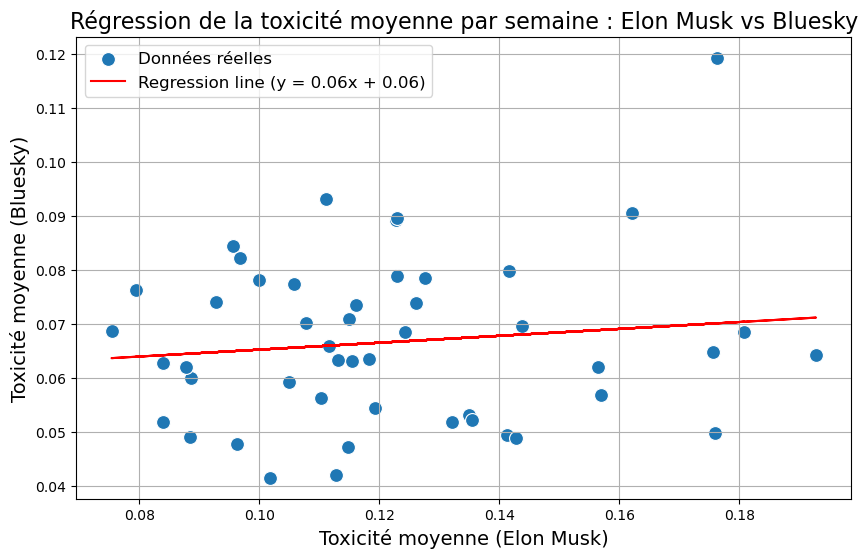

Erreur quadratique moyenne : 0.00022915813962696012
Coefficient de régression : 0.06384571470589126
Coefficient de détermination (R^2) : 0.014214749339725108
Intercept : 0.058883327310458575


In [37]:
# Calculer les moyennes de toxicité par YearWeek
elon_avg_toxicity = elon_df.groupby('YearWeek')['violence_prédite'].mean().reset_index()
bluesky_avg_toxicity = bluesky_df.groupby('YearWeek')['violence_prédite'].mean().reset_index()

# Fusionner les deux moyennes sur YearWeek
merged_data = pd.merge(elon_avg_toxicity, bluesky_avg_toxicity, on='YearWeek', suffixes=('_elon', '_bluesky'))

# Préparer les données pour la régression
X = merged_data['violence_prédite_elon'].values.reshape(-1, 1)  # Variable explicative
y = merged_data['violence_prédite_bluesky'].values  # Variable cible
# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)
r2 = model.score(X, y)

# Prédictions
y_pred = model.predict(X)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y, y_pred)

# Coefficients du modèle
coef = model.coef_[0]
intercept = model.intercept_

# Affichage des résultats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='violence_prédite_elon', y='violence_prédite_bluesky', data=merged_data, label='Données réelles', s=100)
plt.plot(merged_data['violence_prédite_elon'], y_pred, color='red', label=f'Regression line (y = {coef:.2f}x + {intercept:.2f})')
plt.title('Régression de la toxicité moyenne par semaine : Elon Musk vs Bluesky', fontsize=16)
plt.xlabel('Toxicité moyenne (Elon Musk)', fontsize=14)
plt.ylabel('Toxicité moyenne (Bluesky)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Résumé
print("Erreur quadratique moyenne :", mse)
print("Coefficient de régression :", coef)
print("Coefficient de détermination (R^2) :", r2)
print("Intercept :", intercept)


Sans pondération et en regardant la violence moyenne des tweets hebdomadaire sur Elon Musk et Bluesky il n'apparait pas de résultat clair, les couples de violence moyenne semblent très décorrelés  et la regression linéaire apporte peu d'information. 

/tmp/ipykernel_75743/3333992366.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  elon_avg_toxicity1 = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['engagement'])).reset_index(name='violence_prédite_elon1')
/tmp/ipykernel_75743/3333992366.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bluesky_avg_toxicity1 = bluesky_df.groupby('YearWeek').apply(lambda x: np.

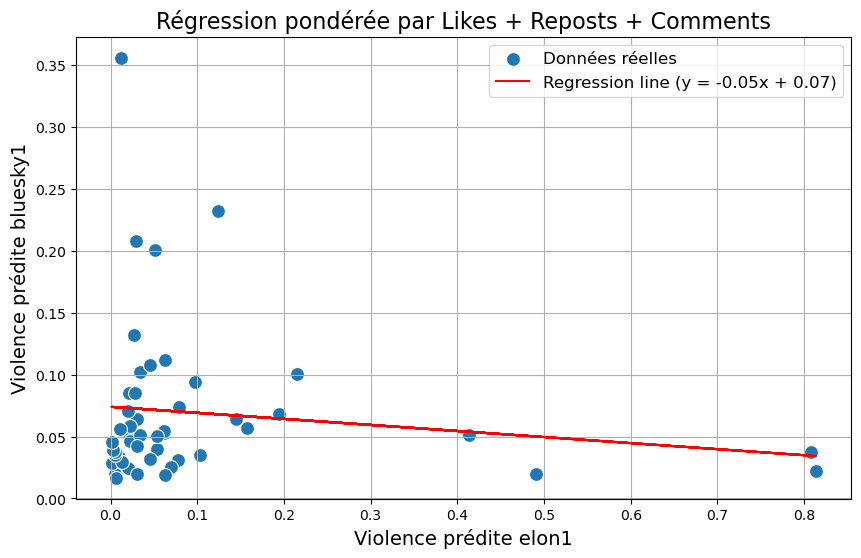

--- Régression pondérée par Likes + Reposts + Comments ---
Erreur quadratique moyenne : 0.00391708395782011
Coefficient de détermination (R^2) : 0.01845619488815331
Coefficient de régression : -0.048846833773545345
Intercept : 0.07400880287292254


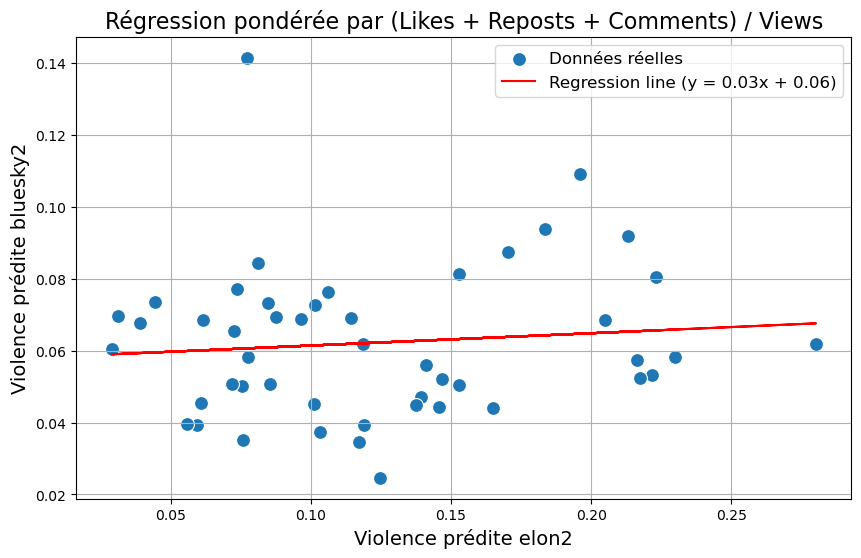

--- Régression pondérée par (Likes + Reposts + Comments) / Views ---
Erreur quadratique moyenne : 0.00043428539956603815
Coefficient de détermination (R^2) : 0.009856449280173374
Coefficient de régression : 0.034310197758351785
Intercept : 0.05800673461736353


In [38]:

elon_df['engagement'] = elon_df['Likes'] + elon_df['Repost'] + elon_df['Comments']
elon_df['taux_d_engagement'] = elon_df['engagement'] / elon_df['Views']
bluesky_df['engagement'] = bluesky_df['Likes'] + bluesky_df['Repost'] + bluesky_df['Comments']
bluesky_df['taux_d_engagement'] = bluesky_df['engagement'] / bluesky_df['Views']

# Calculer les moyennes pondérées de toxicité par YearWeek
elon_avg_toxicity1 = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['engagement'])).reset_index(name='violence_prédite_elon1')
bluesky_avg_toxicity1 = bluesky_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['engagement'])).reset_index(name='violence_prédite_bluesky1')

elon_avg_toxicity2 = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['taux_d_engagement'])).reset_index(name='violence_prédite_elon2')
bluesky_avg_toxicity2 = bluesky_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['taux_d_engagement'])).reset_index(name='violence_prédite_bluesky2')

# Fusionner les deux moyennes pondérées sur YearWeek pour les deux méthodes
merged_data1 = pd.merge(elon_avg_toxicity1, bluesky_avg_toxicity1, on='YearWeek')
merged_data2 = pd.merge(elon_avg_toxicity2, bluesky_avg_toxicity2, on='YearWeek')


# Régression et graphiques pour la première pondération
regression_and_plot_grouped(merged_data1, 'violence_prédite_elon1', 'violence_prédite_bluesky1', 'Régression pondérée par Likes + Reposts + Comments')

# Régression et graphiques pour la deuxième pondération

regression_and_plot_grouped(merged_data2, 'violence_prédite_elon2', 'violence_prédite_bluesky2', 'Régression pondérée par (Likes + Reposts + Comments) / Views')

Afin d'affiner la régression nous avons décider de pondérer la toxicité des tweets par l'engagement qu'ils suscitaient. Ainsi nous ne regardons plus simplement le volume de tweets mais l'impact qu'ils ont et qu'ils suscitent sur le réseau. Cependant les résultats restent très similaires au premier modèle et ne permettent pas d'établir de lien entre la toxicités sur les deux sujets. Nous avons choisi d'utiliser pour pondération l'engagement et le taux d'engagement, comme dans la partie de statistiques descriptives. 

Il est intéressant de noter que malgré une décorrelation évidente sur le premier graphique entre les deux variables qu'en réalité les valeurs sont très concentré au centre du graphique avec certains pic le long de l'axe des abcisses ou des ordonnées, qui sont vraisemblablement des buzzs de popularité sur l'un des sujets concernés. Nous n'observons même pas de buzz simultané, ce qui peut nous indiquer que les sujets n'ont pas une forte corrélation. 

Le deuxième graphique ressemble plus au premier, probablement parce que le taux d'engagement ne modifie pas vraiment la perception de ce qu'il se passe sur X étant donné que ce taux doit être relativement égal peut importe les sujets de la plateforme au cours du temps. 

/tmp/ipykernel_75743/1637809544.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  elon_avg_toxicity_views = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération_views'])).reset_index(name='violence_prédite_elon_views')
/tmp/ipykernel_75743/1637809544.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bluesky_avg_toxicity_views = bluesky_df.groupby('YearWeek

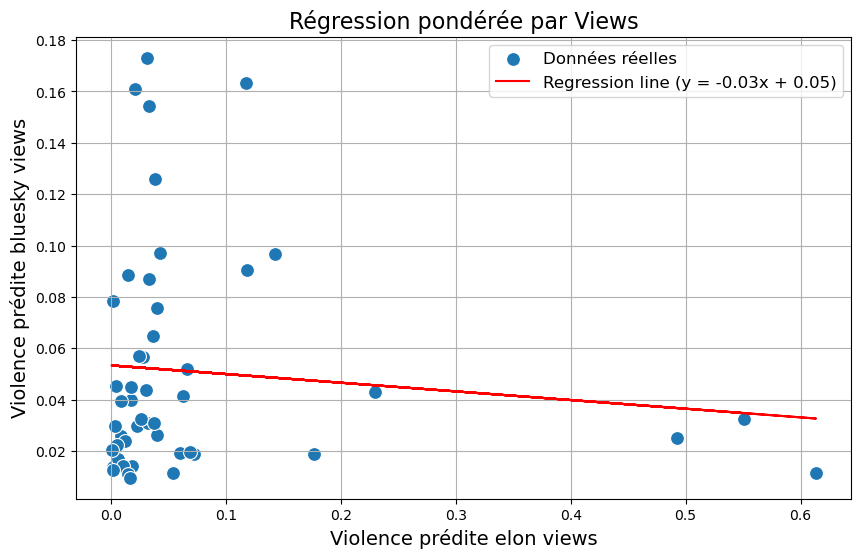

--- Régression pondérée par Views ---
Erreur quadratique moyenne : 0.0018653234958580795
Coefficient de détermination (R^2) : 0.010600920614312836
Coefficient de régression : -0.03370459789614931
Intercept : 0.05335971143892456


In [39]:
# Ajouter une colonne de pondération par les vues
elon_df['pondération_views'] = elon_df['Views']
bluesky_df['pondération_views'] = bluesky_df['Views']

# Calculer les moyennes pondérées de toxicité par YearWeek
elon_avg_toxicity_views = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération_views'])).reset_index(name='violence_prédite_elon_views')
bluesky_avg_toxicity_views = bluesky_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération_views'])).reset_index(name='violence_prédite_bluesky_views')

# Fusionner les moyennes pondérées sur YearWeek
merged_data_views = pd.merge(elon_avg_toxicity_views, bluesky_avg_toxicity_views, on='YearWeek')

# Régression et graphique pour la pondération par les vues
regression_and_plot_grouped(merged_data_views, 'violence_prédite_elon_views', 'violence_prédite_bluesky_views', 'Régression pondérée par Views')


De même nous avons essayé avec une analyse plus simplifier en pondérant avec le nombre de vus, mais ce modèle ne vient pas étayer notre analyse étant donné que les couples de variables sont encore disposés le long des axes du repère. 

Ainsi il semble qu'il n'y a pas de lien de corrélation entre l'avis des utilisateurs de X sur Elon Musk, l'application et Bluesky. Tout ce passe comme si la popularité de l'un n'allait pas de pair avec l'autre alors qu'il semble clair que l'origine même de Bluesky provient de l'aversion que nourissent une partie des utilisateurs à l'encontre de X et de sa gestion par Elon Musk.  

## 2 Relation entre toxicité et popularité des tweets.

Sur un autre ton nous voulions aussi voir si il existait un lien entre la toxicité et la popularité des tweets en testant des modèles avec les différentes pondérations que nous avons utilisez jusque là. 

/tmp/ipykernel_75743/3516119738.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  elon_grouped = elon_df.groupby('YearWeek').apply(


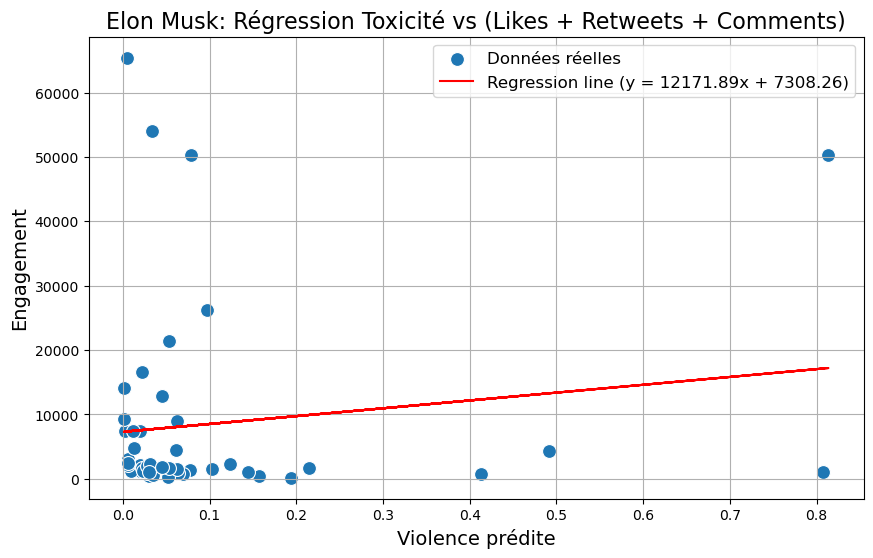

--- Elon Musk: Régression Toxicité vs (Likes + Retweets + Comments) ---
Erreur quadratique moyenne : 225467522.4855186
Coefficient de détermination (R^2) : 0.019880776915182086
Coefficient de régression : 12171.8882488845
Intercept : 7308.256462059841


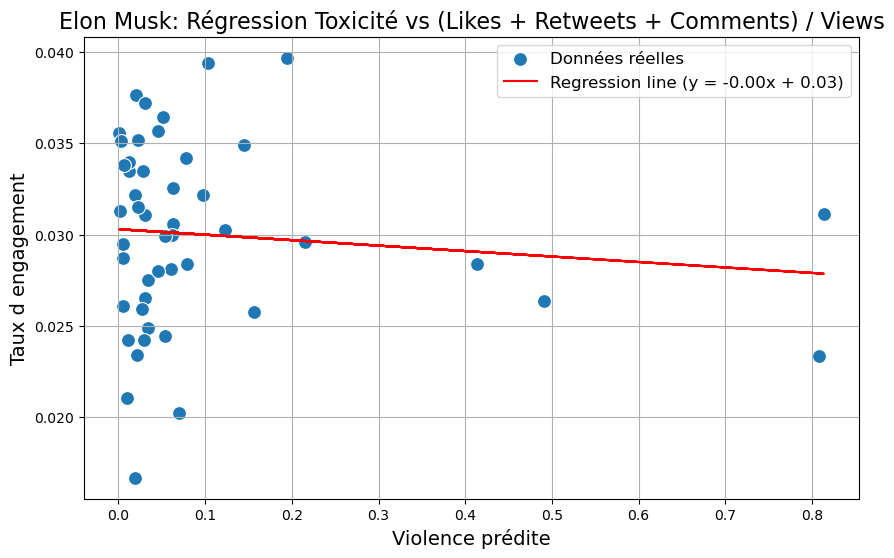

--- Elon Musk: Régression Toxicité vs (Likes + Retweets + Comments) / Views ---
Erreur quadratique moyenne : 2.5287612616430654e-05
Coefficient de détermination (R^2) : 0.01078872522444807
Coefficient de régression : -0.0029890500686103987
Intercept : 0.03029291053000014


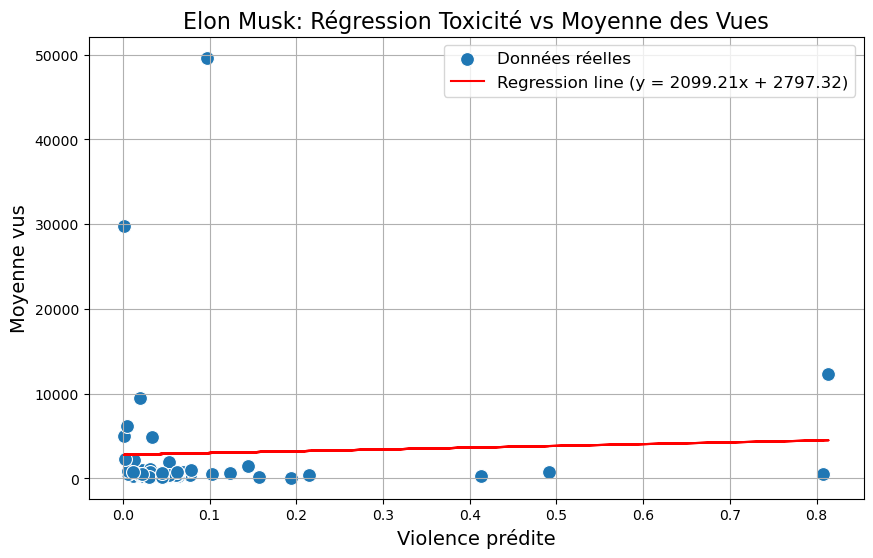

--- Elon Musk: Régression Toxicité vs Moyenne des Vues ---
Erreur quadratique moyenne : 68060668.56735583
Coefficient de détermination (R^2) : 0.001994663135395869
Coefficient de régression : 2099.2066420103724
Intercept : 2797.3157295680935


In [42]:

# Calculer les moyennes pondérées et les taux d'engagement par YearWeek
elon_grouped = elon_df.groupby('YearWeek').apply(
    lambda x: pd.Series({
        'violence_prédite': np.average(x['violence_prédite'], weights=x['engagement']),
        'engagement': x['engagement'].sum(),  
        'taux_d_engagement': (x['engagement'] / x['Views']).mean(),  
        'moyenne_vus': x['Views'].mean()  # Moyenne des vues
    })
).reset_index()



# Régression pour Elon Musk - engagement
regression_and_plot_grouped(elon_grouped, 'violence_prédite', 'engagement', 'Elon Musk: Régression Toxicité vs (Likes + Retweets + Comments)')

# Régression pour Elon Musk - taux d'engagement
regression_and_plot_grouped(elon_grouped, 'violence_prédite', 'taux_d_engagement', 'Elon Musk: Régression Toxicité vs (Likes + Retweets + Comments) / Views')

# Régression pour Elon Musk - vues moyennes
regression_and_plot_grouped(elon_grouped, 'violence_prédite', 'moyenne_vus', 'Elon Musk: Régression Toxicité vs Moyenne des Vues')


/tmp/ipykernel_75743/771018610.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bluesky_grouped = bluesky_df.groupby('YearWeek').apply(


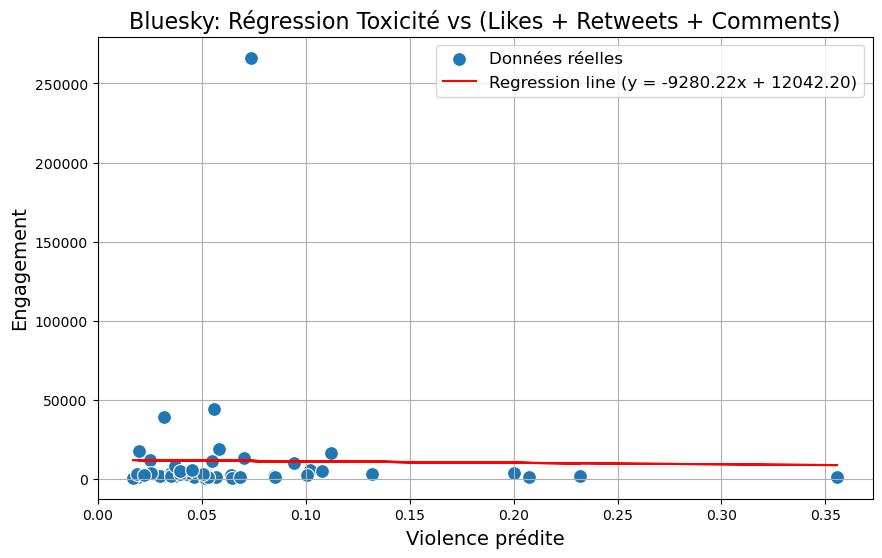

--- Bluesky: Régression Toxicité vs (Likes + Retweets + Comments) ---
Erreur quadratique moyenne : 1457060384.3955767
Coefficient de détermination (R^2) : 0.00023582471048688713
Coefficient de régression : -9280.21521655395
Intercept : 12042.203678956028


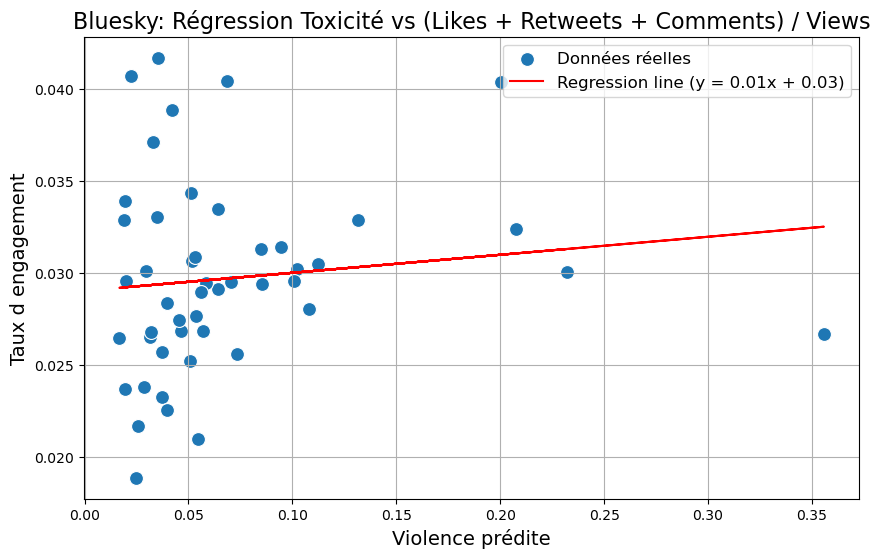

--- Bluesky: Régression Toxicité vs (Likes + Retweets + Comments) / Views ---
Erreur quadratique moyenne : 2.619529063912431e-05
Coefficient de détermination (R^2) : 0.014380104451006459
Coefficient de régression : 0.009786137270174234
Intercept : 0.029026771600815453


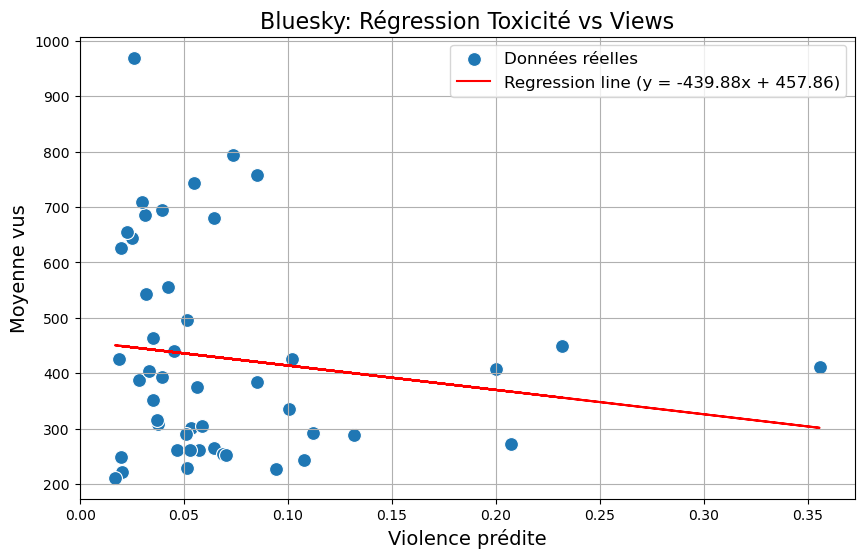

--- Bluesky: Régression Toxicité vs Views ---
Erreur quadratique moyenne : 33811.01714900489
Coefficient de détermination (R^2) : 0.022328116139197274
Coefficient de régression : -439.8777545324764
Intercept : 457.8645476473556


In [44]:
bluesky_grouped = bluesky_df.groupby('YearWeek').apply(
    lambda x: pd.Series({
        'violence_prédite': np.average(x['violence_prédite'], weights=x['engagement']),
        'engagement': x['engagement'].sum(),
        'taux_d_engagement': (x['engagement'] / x['Views']).mean(),  
        'moyenne_vus': x['Views'].mean()  # Moyenne des vues
    })
    ).reset_index()

# Régression pour Bluesky - engagement
regression_and_plot_grouped(bluesky_grouped,'violence_prédite', 'engagement',  'Bluesky: Régression Toxicité vs (Likes + Retweets + Comments)')

# Régression pour Bluesky - taux_d_engagement
regression_and_plot_grouped(bluesky_grouped,  'violence_prédite', 'taux_d_engagement', 'Bluesky: Régression Toxicité vs (Likes + Retweets + Comments) / Views')

# Régression pour Bluesky - vues moyennes
regression_and_plot_grouped(bluesky_grouped,  'violence_prédite', 'moyenne_vus', 'Bluesky: Régression Toxicité vs Views')

